<a href="https://colab.research.google.com/github/sswapnil2/ml-code/blob/master/eager_execution_flowers_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lets's Import required dependencies

In [1]:
from __future__ import print_function, absolute_import, division

import os
import matplotlib.pyplot as plt
import tensorflow as tf
tf.enable_eager_execution()

print(f"Tensorflow version: {tf.__version__}")
print(f"Eager execution: {tf.executing_eagerly()}")

Tensorflow version: 1.13.0-rc2
Eager execution: True


In [2]:
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url), origin=train_dataset_url)

print("Local copy of the dataset: {}".format(train_dataset_fp))

8192/2194 [================================================================================================================] - 0s 0us/step
Local copy of the dataset: /root/.keras/datasets/iris_training.csv


In [3]:
!head -n5 {train_dataset_fp}

120,4,setosa,versicolor,virginica
6.4,2.8,5.6,2.2,2
5.0,2.3,3.3,1.0,1
4.9,2.5,4.5,1.7,2
4.9,3.1,1.5,0.1,0


In [4]:
# column order in csv
column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]

features = column_names[:-1]
label = column_names[-1]

print(f"feature columns: {features}")
print(f"label: {label}")

feature columns: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
label: species


In [0]:
class_names = ["Iris setosa", "Iris vericolor", "Iris virginica"]


In [0]:
batch_size = 32

train_dataset = tf.data.experimental.make_csv_dataset(
  train_dataset_fp,
    batch_size,
    column_names=column_names,
    label_name=label,
     num_epochs=1
)

In [10]:
features, labels = next(iter(train_dataset))

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
features

OrderedDict([('sepal_length',
              <tf.Tensor: id=102, shape=(32,), dtype=float32, numpy=
              array([4.4, 4.9, 5.8, 4.9, 7.7, 5.2, 5. , 4.4, 5.5, 5.7, 5.8, 5. , 5.6,
                     4.7, 5. , 5.9, 4.8, 6.3, 7.7, 4.8, 5.1, 7.4, 5. , 6.9, 6.5, 5.1,
                     6.5, 4.7, 6.4, 5. , 5.8, 5. ], dtype=float32)>),
             ('sepal_width',
              <tf.Tensor: id=103, shape=(32,), dtype=float32, numpy=
              array([2.9, 3.1, 2.7, 2.5, 3.8, 3.5, 3.5, 3.2, 3.5, 2.9, 2.6, 3.2, 2.9,
                     3.2, 3.3, 3.2, 3.4, 2.7, 2.8, 3.1, 3.8, 2.8, 2. , 3.1, 3.2, 3.7,
                     3. , 3.2, 3.2, 3. , 2.8, 2.3], dtype=float32)>),
             ('petal_length',
              <tf.Tensor: id=100, shape=(32,), dtype=float32, numpy=
              array([1.4, 1.5, 5.1, 4.5, 6.7, 1.5, 1.3, 1.3, 1.3, 4.2, 4. , 1.2, 3.6,
                     1.3, 1.4, 4.8, 1.6, 4.9, 6.7, 1.6, 1.5, 6.1, 3.5, 5.1, 5.1, 1.5,
                     5.5, 1.6, 4.5, 1.6, 5.1, 3.

Text(0, 0.5, 'Sepal length')

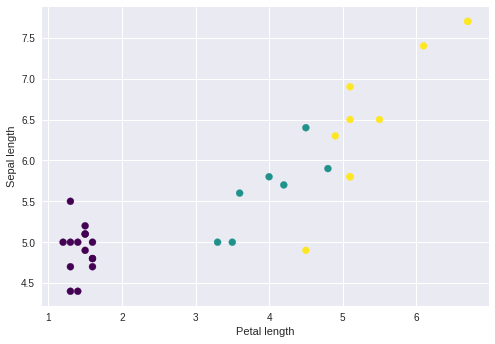

In [13]:
plt.scatter(features["petal_length"].numpy(), features["sepal_length"].numpy(),
           c=labels.numpy(),
           cmap="viridis")
plt.xlabel("Petal length")
plt.ylabel("Sepal length")

In [0]:
def pack_feature_vectors(features, labels):
  features = tf.stack(list(features.values()), axis=1)
  return features, labels

In [0]:
train_dataset = train_dataset.map(pack_feature_vectors)

In [16]:
features, labels = next(iter(train_dataset))

print(features[:5])

tf.Tensor(
[[5.  3.5 1.6 0.6]
 [4.4 2.9 1.4 0.2]
 [6.  3.  4.8 1.8]
 [4.8 3.  1.4 0.1]
 [4.6 3.6 1.  0.2]], shape=(5, 4), dtype=float32)


In [0]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)),  # input shape required
  tf.keras.layers.Dense(10, activation=tf.nn.relu),
  tf.keras.layers.Dense(3)
])

In [18]:
predictions = model(features)
predictions[:5]

<tf.Tensor: id=247, shape=(5, 3), dtype=float32, numpy=
array([[ 1.1677141, -2.2645426, -1.4774466],
       [ 1.0814731, -2.0002358, -1.3830796],
       [ 2.2336037, -3.3881557, -2.6370459],
       [ 1.146116 , -2.1069386, -1.4639828],
       [ 1.0493803, -2.1663754, -1.4348909]], dtype=float32)>

In [19]:
tf.nn.softmax(predictions[:5])

<tf.Tensor: id=253, shape=(5, 3), dtype=float32, numpy=
array([[0.90636533, 0.02928823, 0.06434645],
       [0.88422984, 0.04056916, 0.07520097],
       [0.9888393 , 0.00357789, 0.0075828 ],
       [0.8991323 , 0.03475681, 0.06611075],
       [0.8900667 , 0.03571393, 0.07421938]], dtype=float32)>

In [20]:
print("predictions: {}".format(tf.argmax(predictions, axis=1)))
print(("labels: {}".format(labels)))

predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
labels: [0 0 2 0 0 1 0 2 1 0 1 2 0 1 1 2 1 0 0 1 1 2 2 2 2 1 1 0 0 1 0 2]


In [22]:
def loss(model, x, y):
  y_ = model(x)
  return tf.losses.sparse_softmax_cross_entropy(labels=y, logits=y_)
l = loss(model, features, labels)
print("loss test: {}".format(l))

loss test: 3.3047642707824707


In [0]:
def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets)
  return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [0]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

global_step = tf.Variable(0)

In [28]:
loss_value, grads = grad(model, features, labels)

print("Step: {}, Initial Loss: {}".format(global_step.numpy(),
                                          loss_value.numpy()))

optimizer.apply_gradients(zip(grads, model.trainable_variables), global_step)

print("Step: {},         Loss: {}".format(global_step.numpy(),
                                          loss(model, features, labels).numpy()))

Step: 0, Initial Loss: 3.3047642707824707
Step: 1,         Loss: 2.48681640625


## training loop

In [31]:
from tensorflow import contrib
tfe = contrib.eager

# keep results for plotting
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
  epoch_loss_avg = tfe.metrics.Mean()
  epoch_accuracy = tfe.metrics.Accuracy()
  
  # Training loop using a batch size of 32
  for x, y in train_dataset:
    
    # optimize the model
    loss_value, gradiants = grad(model, x, y)
    optimizer.apply_gradients(zip(gradiants, model.trainable_variables), global_step)
    
    # track progress
    epoch_loss_avg(loss_value)
    
    # compare predicted label to actual label
    epoch_accuracy(tf.argmax(model(x), axis=1, output_type=tf.int32), y)
  
  # end epoxh
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())
  
  if epoch % 50 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Epoch 000: Loss: 1.511, Accuracy: 35.000%
Epoch 050: Loss: 0.644, Accuracy: 95.833%
Epoch 100: Loss: 0.484, Accuracy: 90.000%
Epoch 150: Loss: 0.304, Accuracy: 97.500%
Epoch 200: Loss: 0.199, Accuracy: 98.333%


## Visualize loss function over time

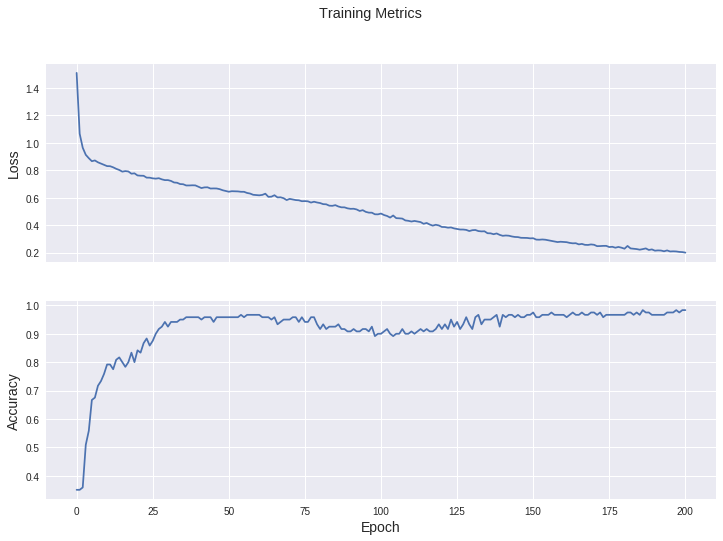

In [35]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12,8 ))
fig.suptitle("Training Metrics")

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)

## Evaluate model on test  dataset

In [36]:
test_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv"

test_fp = tf.keras.utils.get_file(fname=os.path.basename(test_url),
                                  origin=test_url)

8192/573 [============================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 0us/step


In [0]:
test_dataset = tf.contrib.data.make_csv_dataset(
    test_fp,
    batch_size, 
    column_names=column_names,
    label_name='species',
    num_epochs=1,
    shuffle=False)

test_dataset = test_dataset.map(pack_feature_vectors)

In [39]:
test_accuracy = tfe.metrics.Accuracy()

for (x, y) in test_dataset:
  logits = model(x)
  prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
  test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 96.667%


In [40]:
tf.stack([y,prediction],axis=1)

<tf.Tensor: id=108948, shape=(30, 2), dtype=int32, numpy=
array([[1, 1],
       [2, 2],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [2, 2],
       [1, 1],
       [2, 2],
       [2, 2],
       [0, 0],
       [2, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [2, 2],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 1]], dtype=int32)>

In [41]:
predict_dataset = tf.convert_to_tensor([
    [5.1, 3.3, 1.7, 0.5,],
    [5.9, 3.0, 4.2, 1.5,],
    [6.9, 3.1, 5.4, 2.1]
])

predictions = model(predict_dataset)

for i, logits in enumerate(predictions):
  class_idx = tf.argmax(logits).numpy()
  p = tf.nn.softmax(logits)[class_idx]
  name = class_names[class_idx]
  print("Example {} prediction: {} ({:4.1f}%)".format(i, name, 100*p))



Example 0 prediction: Iris setosa (96.1%)
Example 1 prediction: Iris vericolor (75.3%)
Example 2 prediction: Iris virginica (69.4%)
